In [25]:
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil import parser
import numpy as np

conn = None
try:
    conn = sqlite3.connect("../elprotest.db")
    print(sqlite3.version)
except Error as e:
    print(e)

2.6.0


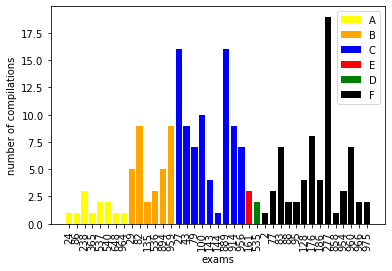

min : 1
max : 19
average:  4.9743589743589745


In [26]:
'''
compulsive compilation
'''
cur = conn.cursor()
query = "select count(c2.id), c2.exam, r2.grade " \
        "from exams e , compilations c2 ,  results r2, sessions s2, grade_sort gs" \
        " where c2.exam=e.id and e.session =15 and s.id = e.student and s.id = r2.student " \
        "and r2.session=s2.date and e.session=s2.id and gs.grade=r2.grade and r2.grade!=\"ASS\"" \
        ' group by c2.exam order by gs.id'

query = 'select count(c.id), c.exam, r2.grade  ' \
        'from results as r2, sessions as s2, students as s, exams as e, compilations as c, grade_sort as gs ' \
        'where s2.date=r2.session and s2.id=15 and s.id=r2.student and e.student=s.id' \
        ' and c.exam=e.id and gs.grade=r2.grade and r2.grade!="ASS" group by e.id order by gs.id'

cur.execute(query)

rows = cur.fetchall()

colormap = {"OTT": "yellow", "DIT": "orange", "BUO": "blue", "SUF": "green", "DIS":"red", "INSUF":"black", "RIT":"grey"}
grademap = {"OTT": "A", "DIT": "B", "BUO": "C", "SUF": "D", "DIS":"E",
            "INSUF":"F", "RIT":"RET"}

grades = []
compilations = []
exams = []
labels = []

for row in rows:
    compilations.append(row[0])
    exams.append(str(row[1]))
    grades.append(colormap[row[2]])
    labels.append(grademap[row[2]])

plt.figure()
plt.xticks(rotation=90)
used_labels = []
for i in range(len(exams)):
    if labels[i] not in used_labels:
        plt.bar(exams[i], compilations[i], color=grades[i], label=labels[i])
        used_labels.append(labels[i])
    else:
        plt.bar(exams[i], compilations[i], color=grades[i])
plt.xlabel("exams")
plt.ylabel("number of compilations")
plt.legend(loc='upper right')
plt.savefig("../images/last_result_comp.png",dpi=300, bbox_inches = "tight")

plt.show()
print("min :", min(compilations))
print("max :", max(compilations))
print("average: ", np.average(compilations))

1558337363


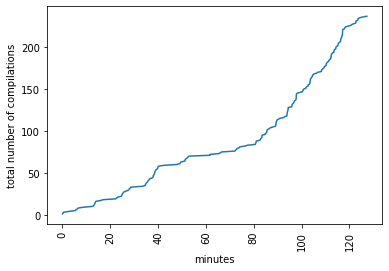

In [27]:
cur = conn.cursor()
query = 'select count(c2.id), c2.datetime ' \
        'from students s , sessions s2, exams e2 , compilations c2 ' \
        'where s2.id =15 and e2.session=s2.id and e2.student = s.id ' \
        ' and c2.exam=e2.id ' \
        'group by c2.datetime order by c2.datetime asc'
cur.execute(query)

rows = cur.fetchall()

times = []
compilations = [0]
for row in rows:
    times.append(row[1])
    compilations.append(row[0]+compilations[-1])

start_time = min(times)
print(start_time)
for i in range(len(times)):
    times[i] = (times[i] - start_time)/60

plt.figure()
plt.plot(times, compilations[1:])
plt.xticks(rotation=90)
plt.xlabel("minutes")
plt.ylabel("total number of compilations")
plt.savefig("../images/last_comp_freq.png",dpi=300, bbox_inches = "tight")

plt.show()

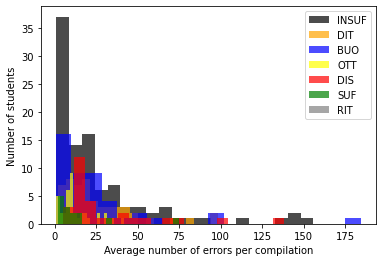

In [28]:
cur = conn.cursor()
query = 'select avg(q1.n), q1.gr  ' \
        'from  ( select count(c.seq) as n, c.compilationid , ' \
        'c2.exam as ex  , r2.grade as gr ' \
        'from compilerlogs c , compilations c2 , last_compilation lc ,' \
        ' exams e , students s, results r2 ' \
        'where c.compilationid =  c2.id and lc.exam =c2.exam ' \
        'and s.id=e.student and c2.exam= e.id and lc.success =0  ' \
        'and s.id =r2.student ' \
        'and gr!="ASS"  group by c2.id)  q1 group by q1.ex'
cur.execute(query)
rows = cur.fetchall()

labels = []


grades ={}
for row in rows:
       if row[1] not in grades.keys():
           grades[row[1]] = [row[0]]
       else:
           grades[row[1]].append(row[0])
kwargs = dict(alpha=0.7, bins=20, density=False)
colormap = {"OTT": "yellow", "DIT": "orange", "BUO": "blue", "SUF": "green", "DIS":"red", "INSUF":"black", "RIT":"grey"}
plt.figure()
for key in grades.keys():
    plt.hist(grades[key], **kwargs, color=colormap[key],label=key)

plt.legend()
plt.xlabel("Average number of errors per compilation")
plt.ylabel("Number of students")
plt.savefig("../images/last_result_comp_all.png",dpi=300, bbox_inches = "tight")

plt.show()



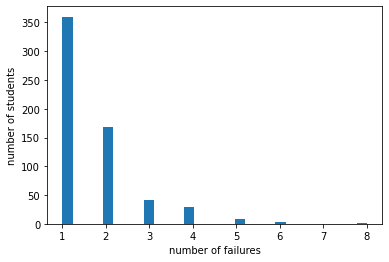

In [30]:
query = 'select count(*) n, r.student ' \
        'from results r  where r.grade != "ASS" ' \
        'group by r.student  order by n desc'
cur = conn.cursor()
cur.execute(query)
rows = cur.fetchall()

exams = []
for row in rows:
    exams.append(row[0])
plt.figure()
plt.hist(exams, bins=30)
plt.xlabel("number of failures")
plt.ylabel("number of students")
plt.savefig("../images/last_freq_fail.png",dpi=300, bbox_inches = "tight")


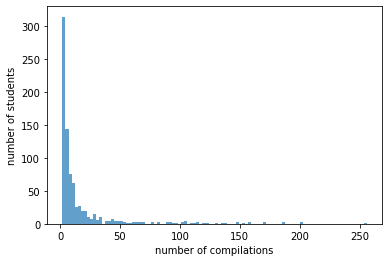

In [31]:
cur = conn.cursor()
query = 'select cc.n from ' \
        '(select count(c.id) as n from compilations as c group by c.exam) ' \
        'as cc where cc.n> 1'
cur.execute(query)
rows = cur.fetchall()

values = []


for row in rows:
       values.append(row[0])
plt.figure()
kwargs = dict(alpha=0.7, bins=100, density=False)

all_values = []

plt.hist(values, **kwargs)

#plt.legend()
plt.xlabel("number of compilations")
plt.ylabel("number of students")
plt.savefig("../images/dist_comp.png",dpi=300, bbox_inches = "tight")

plt.show()